In [263]:
#3 punto creacion de un controlador difuso
#Librerias a usar
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

In [264]:
#Variables de entrada

ahorro = ctrl.Antecedent(np.arange(0,51,1),'Cantidad de dinero ahorrado')
salario = ctrl.Antecedent(np.arange(0,16,1),'salario mensaual')

#Variable de salida

cliente_preferencial = ctrl.Consequent(np.arange(0,101), 'cliente preferencial')

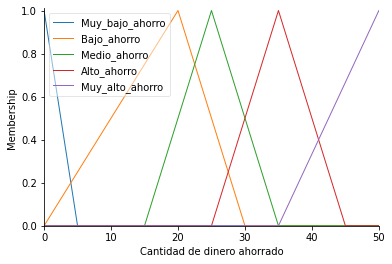

In [265]:
#Funciones de membresia 

# Dinero ahorrado muy bajo - bajo - medio - alto - muy alto

ahorro['Muy_bajo_ahorro'] = fuzz.trimf(ahorro.universe,[0,0,5])
ahorro['Bajo_ahorro'] = fuzz.trimf(ahorro.universe,[0,20,30])
ahorro['Medio_ahorro'] = fuzz.trimf(ahorro.universe,[15,25,35])
ahorro['Alto_ahorro'] = fuzz.trimf(ahorro.universe,[25,35,45])
ahorro['Muy_alto_ahorro'] = fuzz.trimf(ahorro.universe,[35,50,50])

ahorro.view()

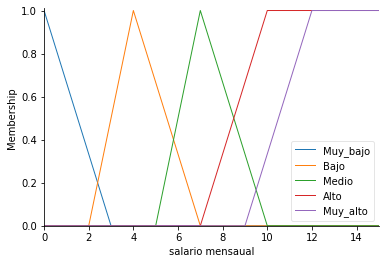

In [266]:
#Salario muy bajo - bajo - medio - alto - muy alto

salario['Muy_bajo'] = fuzz.trimf(salario.universe,[0,0,3])
salario['Bajo'] = fuzz.trimf(salario.universe,[2,4,7]) 
salario['Medio'] = fuzz.trimf(salario.universe,[5,7,10])
salario['Alto'] = fuzz.trapmf(salario.universe,[7,10,15,15])
salario['Muy_alto'] = fuzz.trapmf(salario.universe,[9,12,15,15])

salario.view()

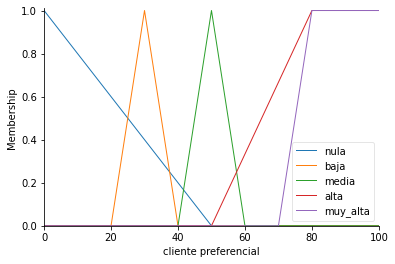

In [267]:
#Variables de salida
#Cliente preferencial nula- baja - media - alta - muy alya

cliente_preferencial['nula'] = fuzz.trimf(cliente_preferencial.universe,[0,0,50])
cliente_preferencial['baja'] = fuzz.trimf(cliente_preferencial.universe,[20,30,40])
cliente_preferencial['media'] = fuzz.trimf(cliente_preferencial.universe,[40,50,60])
cliente_preferencial['alta'] = fuzz.trapmf(cliente_preferencial.universe,[50,80,100,100])
cliente_preferencial['muy_alta'] = fuzz.trapmf(cliente_preferencial.universe,[70,80,100,100])

cliente_preferencial.view()


In [268]:
#Crear reglas difusas

regla_11 = ctrl.Rule(salario['Muy_bajo']&ahorro['Muy_bajo_ahorro'] ,cliente_preferencial['nula'])
regla_12 = ctrl.Rule(salario['Muy_bajo']&ahorro['Bajo_ahorro'] ,cliente_preferencial['nula'])
regla_13 = ctrl.Rule(salario['Muy_bajo']&ahorro['Medio_ahorro'] ,cliente_preferencial['nula'])
regla_14 = ctrl.Rule(salario['Muy_bajo']&ahorro['Alto_ahorro'] ,cliente_preferencial['baja'])
regla_15 = ctrl.Rule(salario['Muy_bajo']&ahorro['Muy_alto_ahorro'] ,cliente_preferencial['media'])

regla_21 = ctrl.Rule(salario['Bajo']&ahorro['Muy_bajo_ahorro'] ,cliente_preferencial['nula'])
regla_22 = ctrl.Rule(salario['Bajo']&ahorro['Bajo_ahorro'] ,cliente_preferencial['nula'])
regla_23 = ctrl.Rule(salario['Bajo']&ahorro['Medio_ahorro'] ,cliente_preferencial['baja'])
regla_24 = ctrl.Rule(salario['Bajo']&ahorro['Alto_ahorro'] ,cliente_preferencial['media'])
regla_25 = ctrl.Rule(salario['Bajo']&ahorro['Muy_alto_ahorro'] ,cliente_preferencial['media'])

regla_31 = ctrl.Rule(salario['Medio']&ahorro['Muy_bajo_ahorro'] ,cliente_preferencial['baja'])
regla_32 = ctrl.Rule(salario['Medio']&ahorro['Bajo_ahorro'] ,cliente_preferencial['media'])
regla_33 = ctrl.Rule(salario['Medio']&ahorro['Medio_ahorro'] ,cliente_preferencial['media'])
regla_34 = ctrl.Rule(salario['Medio']&ahorro['Alto_ahorro'] ,cliente_preferencial['alta'])
regla_35 = ctrl.Rule(salario['Medio']&ahorro['Muy_alto_ahorro'] ,cliente_preferencial['alta'])

regla_41 = ctrl.Rule(salario['Alto']&ahorro['Muy_bajo_ahorro'] ,cliente_preferencial['media'])
regla_42 = ctrl.Rule(salario['Alto']&ahorro['Bajo_ahorro'] ,cliente_preferencial['media'])
regla_43 = ctrl.Rule(salario['Alto']&ahorro['Medio_ahorro'] ,cliente_preferencial['alta'])
regla_44 = ctrl.Rule(salario['Alto']&ahorro['Alto_ahorro'] ,cliente_preferencial['alta'])
regla_45 = ctrl.Rule(salario['Alto']&ahorro['Muy_alto_ahorro'] ,cliente_preferencial['muy_alta'])

regla_51 = ctrl.Rule(salario['Bajo']&ahorro['Muy_bajo_ahorro'] ,cliente_preferencial['media'])
regla_52 = ctrl.Rule(salario['Bajo']&ahorro['Bajo_ahorro'] ,cliente_preferencial['alta'])
regla_53 = ctrl.Rule(salario['Bajo']&ahorro['Medio_ahorro'] ,cliente_preferencial['alta'])
regla_54 = ctrl.Rule(salario['Bajo']&ahorro['Alto_ahorro'] ,cliente_preferencial['muy_alta'])
regla_55 = ctrl.Rule(salario['Bajo']&ahorro['Muy_alto_ahorro'] ,cliente_preferencial['muy_alta'])




In [269]:
#Sistema de control

sistema_control = ctrl.ControlSystem(
    [
        regla_11,
        regla_12,
        regla_13,
        regla_14,
        regla_15,
        regla_21,
        regla_22,
        regla_23,
        regla_24,
        regla_25,
        regla_31,
        regla_32,
        regla_33,
        regla_34,
        regla_35,
        regla_41,
        regla_42,
        regla_43,
        regla_44,
        regla_45,
        regla_51,
        regla_52,
        regla_53,
        regla_54,
        regla_55
    ]
)

controlador = ctrl.ControlSystemSimulation(sistema_control)




In [277]:
#Dinero ahoorado 500 millones y salario mensual 15 millones
#Que probabilidad de ser cliente preferencial??

controlador.input['Cantidad de dinero ahorrado']= 50
controlador.input['salario mensaual']= 15
controlador.compute()

#Resultado

Probablidad_total = controlador.output['cliente preferencial']
print(f"la probablidad es : {Probablidad_total}%")


la probablidad es : 87.33333333333331%
